In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#### Change color space

- HSV = Hue(색상), Saturation(채도), Value(명도)
- Hue = [0 ~ 179]
- Sat = [0 ~ 255]
- Val = [0 ~ 255]

### tracking

In [ ]:
# HSV is more easier to represent a color than RGB

cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    
    # convert BGR to HSV
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    
    # define range of blue color in HSV
    lower_blue = np.array([110, 50, 50])
    upper_blue = np.array([130, 255, 255])
    
    # Threshold the HSV image to get only blue colors
    mask = cv2.inRange(hsv, lower_blue, upper_blue)
    
    res = cv2.bitwise_and(frame, frame, mask = mask)
    # not일 경우 파란색만 제외
    
    cv2.imshow('frame', frame)
    cv2.imshow('mask', mask)
    cv2.imshow('res', res)
    k = cv2.waitKey(5) & 0xFF
    if k == 27:
        break

cv2.destoryAllWindows()

### image thresholding

- if pixel value > threshold value, it is assigned one value else another value

- BINARY : if True: 255, else: 0
- BINARY_INV : if True: 0, else: 255
- TRUNC : if True: 255, else: original value
- TOZERO : if True: original value, else: 0
- TOZERO_INV : if True: 0, else: original value

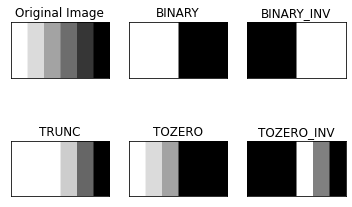

In [6]:
img = cv2.imread('/Users/sejongpyo/Downloads/wallpaper.png',0)
ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)
#       (src, 임계값, 임계값을 넘었을 때 적용할 value, type of Thresh)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

### adpative thresholding
- to process image in all the conditions

- MEAN_C : threshold value is the mean of near areas
- GAUSSIAN_C : threshold value is the weighted sum of near areas values where weights are a gaussian window

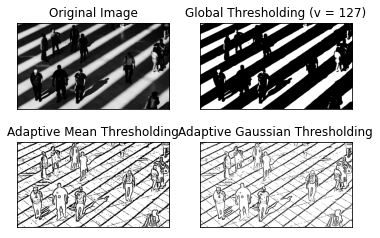

In [19]:
img = cv2.imread('/Users/sejongpyo/Downloads/gray.jpg', 0)
img = cv2.medianBlur(img, 5) # remove noise

ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,
                            cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                            cv2.THRESH_BINARY,11,2)
#                 (, maxValue, adaptive method, block size, C)
# block size = size of neighbourhood area
# c = subtracted from the mean or weighted mean calculated

titles = ['Original Image', 'Global Thresholding (v = 127)',
          'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]

for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

#### Otsu's Binarization

- For bimodal image(image's histrogram as two peaks), Otsu's binarization automatically calculates a threshold value.
- If images aren't bimodal, it isn't accurate.

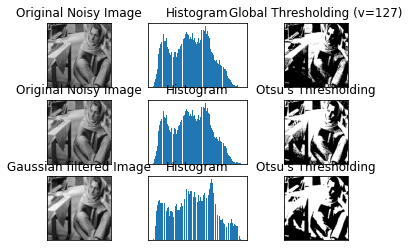

In [13]:
img = cv2.imread('/Users/sejongpyo/Downloads/noisy.jpg', 0)

# global thresholding (critical val = 127)
ret1, th1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

# Otsu's thresholding
ret2, th2 = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(img, (5, 5), 0)
ret3, th3 = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

images = [img, 0, th1,
          img, 0, th2,
          blur, 0, th3]

titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
          'Original Noisy Image','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]

for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()

- Otsu 이진화는 임계값 T를 기준으로 영상 픽셀들을 두 클래스로 분류했을 때, 두 클래스 간의 intra-class variance를 최소화하거나 inter-class variance를 최대화하는 T를 찾는 방법  
- 입력 영상에서 임계값 T보다 어두운 픽셀들의 비율을 α, 밝기 평균을 μ1, 분산을 σ12, T보다 밝은 픽셀들의 비율을 β, 밝기 평균을 μ2, 분산을 σ22라 했을 때 (α+β=1), intra-class 분산과 inter-class 분산은 각각 다음과 같이 계산  
- intra-class variance = ασ1^2+βσ2^2 
- inter-class variance = αβ(μ1-μ2)^2